---
title: Plane Waves and Math Review - Homework 01
date: 2025-01-12
authors:
  - name: Professor Craig Cahillane
    orcid: 0000-0002-3888-314X
    affiliations:
      - Syracuse University
numbering:
  heading_1: true
  heading_2: true
  heading_3: true
---

This is the first homework assignment for *Lasers and Optomechanics* at Syracuse University.

<span style="color:#ff5555;">**It is due 5pm on Friday, January 23, 2026**</span>

**You will need to complete the questions in this jupyter notebook and submit it via your `git` repo**


In [1]:
%matplotlib widget
from ipywidgets import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('dark_background')

fontsize = 14
mpl.rcParams.update(
    {
        "text.usetex": False,#changed from True to not get tex errorcd
        "figure.figsize": (9, 6),
        "figure.autolayout": True,
        "font.family": "serif",
        "font.serif": "georgia",
        # 'mathtext.fontset': 'cm',
        "lines.linewidth": 1.5,
        "font.size": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "legend.fancybox": True,
        "legend.fontsize": fontsize,
        "legend.framealpha": 0.7,
        "legend.handletextpad": 0.5,
        "legend.labelspacing": 0.2,
        "legend.loc": "best",
        "axes.edgecolor": "#b0b0b0",
        "grid.color": "#707070",  # grid color"
        "xtick.color": "#b0b0b0",
        "ytick.color": "#b0b0b0",
        "savefig.dpi": 80,
        "pdf.compression": 9,
    }
)

**<span style="color:#ffaaff;">Approximations Review</span>**

In this course, you will need to remember and use some basic approximations.\
These approximations all come from taking the [*Taylor Expansion*](https://en.wikipedia.org/wiki/Taylor_series) of a function $f(x)$ about some point $x = a$:
$$f(x)\Bigr|_{x \rightarrow a} \approx f(a) + f'(a) (x-a) + \dfrac{1}{2!} f''(a) (x-a)^2 = \displaystyle \sum_{n=0}^\infty \dfrac{f^{(n)}(a)}{n!}(x - a)^n$$


# <span style="color: #ff5500">Question 1: Binomial Approximation</a>
The binomial approximation to first order in $x$ is as follows:
\begin{align}
(1 + x)^{n} \approx 1 + n x.
\end{align}

## <span style="color:#ccccff;">Question 1A</span>
Derive the binomial approximation using the Taylor Expansion to first order about $x = 0$

## <span style="color:#ccccff;">Question 1B</span>
Find the second and third order terms of the binomial approximation

## <span style="color:#ccccff;">Question 1C</span>
Plot the binomial function on $x \in [-1, 1]$ for $n = \dfrac{1}{2}$.\
Compare to plots of the first, second, and third order binomial approximation.\
At what $x > 0$ does each approximation fail, becoming greater than 5\% error?

## Question 1A Solution: <span style="color:#ff5555;">(This example filled out for you)</span>
Let $$f(x) = (1 + x)^n,$$ 
then at $x = 0$, $$f(0) = 1.$$
Then the first derivative $f'(x)$ is $$f'(x) = n (1 + x)^{n-1}$$
and the derivative evaluated at $x = 0$ is $$f'(0) = n$$

The Taylor Expansion to first order then becomes 
\begin{align}
f(x)\Bigr|_{x \rightarrow 0} &\approx f(0) + f'(0) x\\~\\
&= 1 + n x
\end{align}

## Question 1B Solution:
Taking the second and third derivatives, and evaluating at 0 yields
\begin{align}
f''(x) &= n (n-1) (1 + x)^{n-2} \\
f'''(x) &= n (n-1) (n-2) (1 + x)^{n-3} \\~\\
f''(0) &= n (n-1)\\
f''(0) &= n (n-1) (n-2)
\end{align}

The second order expansion is
\begin{align}
f(x)\Bigr|_{x \rightarrow 0} &\approx f(0) + f'(0) x + \dfrac{1}{2!} f''(0) x^2\\~\\
&= 1 + n x + \dfrac{1}{2} n (n-1) x^2
\end{align}

The third order expansion is
\begin{align}
f(x)\Bigr|_{x \rightarrow 0} &\approx f(0) + f'(0) x + \dfrac{1}{2!} f''(0) x^2 + \dfrac{1}{3!} f'''(0) x^3\\~\\
&= 1 + n x + \dfrac{1}{2} n (n-1) x^2 + \dfrac{1}{6} n (n-1) (n-2) x^3
\end{align}

In [2]:
def binom(xx:float, nn:float):
    """Binomial function (1 + xx)^nn
    
    Inputs:
    -------
    xx: float or array of floats
        binomial variable
    nn: float
        binomial exponent

    Output:
    -------
    binom: float or array of floats
        binomial expansion
    """
    return (1 + xx)**nn

In [3]:
# Parameter definitions.  Protip: never make single-letter variable names
nn = 0.5
xx = np.linspace(-1, 2, 100)

taylor0 = 1
taylor1 = taylor0 + nn * xx
taylor2 = taylor1 + 0.5 * nn * (nn - 1) * xx**2
taylor3 = taylor2 + (1/6) * nn * (nn - 1) * (nn - 2) * xx**3

In [4]:
# At which x does the error become greater than 5%?
# First, we divide the approximation by the real function,
# Second, we subtract 1 from that ratio
# Third, we take the absolute value of the subtraction
# Fourth, we look for the first location where the final result is greater than 0.1
# Fifth, we find where x > 0
# Sixth, we take the intersection of the indices found
# Seventh, we find the first index where the error is large for plotting
error = 0.05
model = binom(xx, nn)

xx_errors = np.array([])
for taylor in [taylor1, taylor2, taylor3]:
    abs_errors = np.abs(taylor/model - 1) # final result
    indices_error = np.argwhere(abs_errors > error)
    indices_x = np.argwhere(xx > 0)
    
    indices_final = np.intersect1d(indices_error, indices_x)
    index = indices_final[0]
    
    xx_errors = np.append(xx_errors, xx[index])
print(xx_errors)

[0.87878788 1.3030303  1.42424242]


C:\Users\Jandrie\AppData\Local\Temp\ipykernel_5680\901952363.py:14: RuntimeWarning: divide by zero encountered in divide
  abs_errors = np.abs(taylor/model - 1) # final result


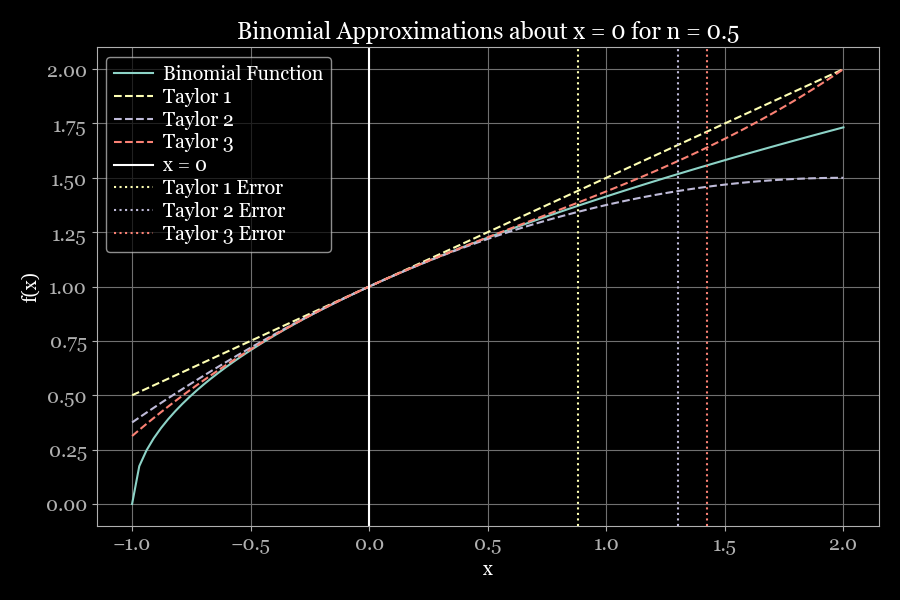

In [5]:
fig, s1 = plt.subplots(1)

s1.plot(xx, binom(xx, nn), label="Binomial Function")
s1.plot(xx, taylor1, ls="--", label="Taylor 1")
s1.plot(xx, taylor2, ls="--", label="Taylor 2")
s1.plot(xx, taylor3, ls="--", label="Taylor 3")

s1.axvline(x=0, label=f"x = 0")

for ii, xx_error in enumerate(xx_errors):
    s1.axvline(x=xx_error, color=f"C{ii+1}",ls=":", label=f"Taylor {ii+1} Error")

s1.set_title("Binomial Approximations about x = 0 for n = " + f"{nn}" + "")
s1.set_xlabel("x")
s1.set_ylabel("f(x)")
s1.legend()
s1.grid()
plt.show()

# <span style="color: #ff5500">Question 2: Sine and Cosine Approximations</a>

## Question 2A: Sine 
Repeat the Taylor Expansion approximations for sine  to second order about $x = 0$.\
Make the plots, but you don't need to calculate the 5\% error point.


## Question 2A Solution:
Let $$f(x) = sin(x),$$ 
then at $x = 0$, $$f(0) = 0.$$
Then the first derivative $f'(x)$ is $$f'(x) = cos(x)$$
and the derivative evaluated at $x = 0$ is $$f'(0) = 1$$
Then the second derivative $f''(x)$ is $$f''(x) = -sin(x)$$
and the derivative evaluated at $x = 0$ is $$f''(0) = 0$$


The second order expansion is
\begin{align}
f(x)\Bigr|_{x \rightarrow 0} &\approx f(0) + f'(0) x + \dfrac{1}{2!} f''(0) x^2\\~\\
&= 1x
\end{align}

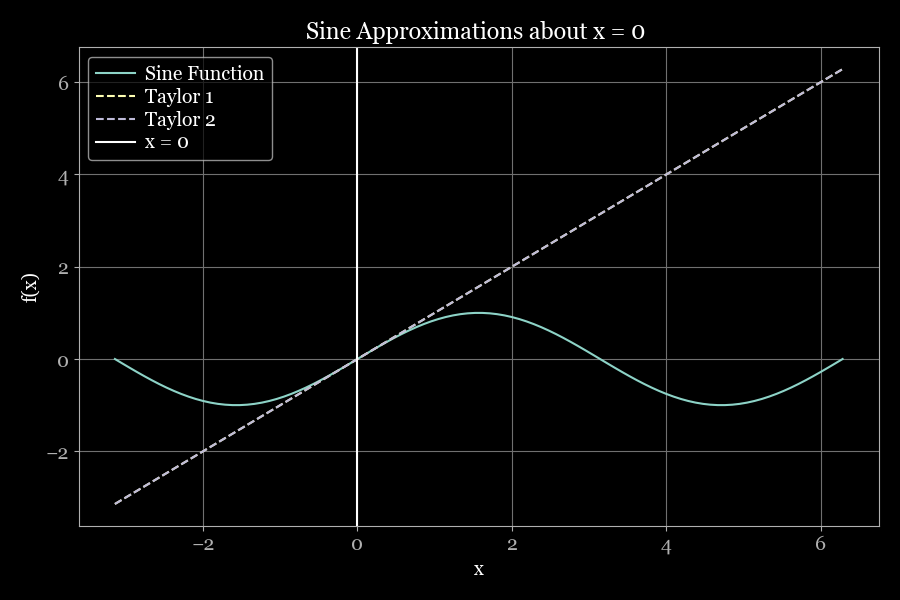

In [6]:
# Parameter definitions for sine.
xsine = np.linspace(-np.pi, 2*np.pi, 100)

taylor0sine = 0
taylor1sine = taylor0sine + 1* xsine
taylor2sine = taylor1sine + 0

#Plotting sine and it's taylow expansion
fig, s1 = plt.subplots(1)

s1.plot(xsine, np.sin(xsine), label="Sine Function")
s1.plot(xsine, taylor1sine, ls="--", label="Taylor 1")
s1.plot(xsine, taylor2sine, ls="--", label="Taylor 2")

s1.axvline(x=0, label=f"x = 0")
s1.set_title("Sine Approximations about x = 0 ")
s1.set_xlabel("x")
s1.set_ylabel("f(x)")
s1.legend()
s1.grid()
plt.show()

## Question 2B: Cosine
Repeat the Taylor Expansion approximations for cosine to second order about $x = 0$.\
Make the plots, but you don't need to calculate the 5\% error point.

## Question 2B Solution:
Let $$f(x) = cos(x),$$ 
then at $x = 0$, $$f(0) = 1.$$
Then the first derivative $f'(x)$ is $$f'(x) = -sin(x)$$
and the derivative evaluated at $x = 0$ is $$f'(0) = 0$$
Then the second derivative $f''(x)$ is $$f''(x) = -cos(x)$$
and the derivative evaluated at $x = 0$ is $$f''(0) = -1$$


The second order expansion is
\begin{align}
f(x)\Bigr|_{x \rightarrow 0} &\approx f(0) + f'(0) x + \dfrac{1}{2!} f''(0) x^2\\~\\
&= 1 -  \dfrac{1}{2!} x^2
\end{align}

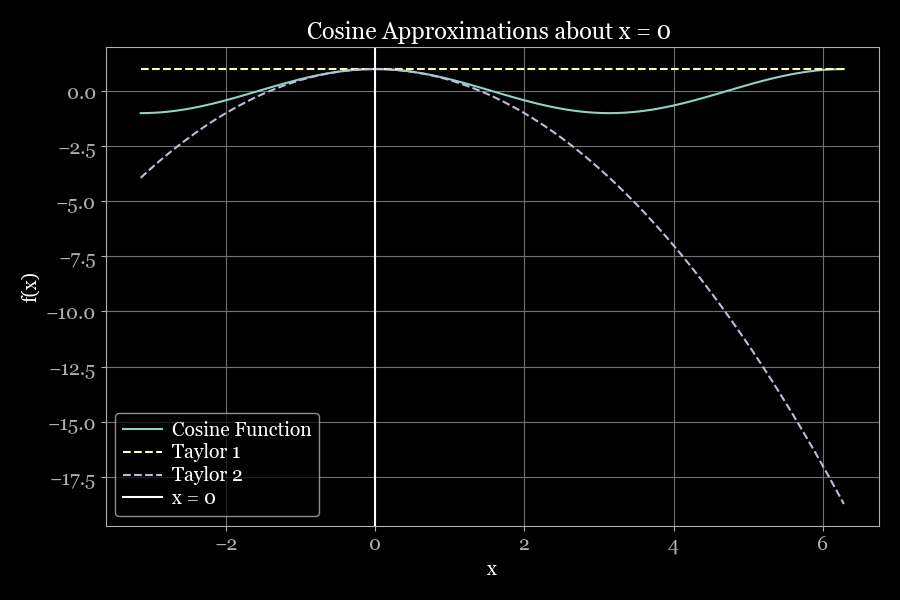

In [7]:
# Parameter definitions for cosine.
xcos = np.linspace(-np.pi, 2*np.pi, 100)

taylor0cos = 1
#To plot make array of 1s
taylor0cos = np.ones_like(xcos)
taylor1cos = taylor0cos + 0
taylor2cos = taylor1cos - 0.5 * xcos**2

#Plotting sine and it's taylow expansion
fig, s1 = plt.subplots(1)

s1.plot(xcos, np.cos(xcos), label="Cosine Function")
s1.plot(xcos, taylor1cos, ls="--", label="Taylor 1")
s1.plot(xcos, taylor2cos, ls="--", label="Taylor 2")

s1.axvline(x=0, label=f"x = 0")
s1.set_title("Cosine Approximations about x = 0 ")
s1.set_xlabel("x")
s1.set_ylabel("f(x)")
s1.legend()
s1.grid()
plt.show()

# <span style="color: #ff5500">Question 3: Complex Number Review</a>
## Question 3A Solution:
Plot the following complex function on a domain of $\phi \in [0, 2 \pi]$:
\begin{align}
z_1(\phi) &= 2 + e^{i \phi}\\
z_2(\phi) &= \dfrac{3}{2 - e^{i \phi}}\\
z_3(\phi) &= e^{(\sigma + i \omega) t}
\end{align}
where for $z_4$, $\sigma = -0.5$, and $\omega = 1$.

## Question 3A Solution:
*fixed to have t-> $\phi$

<>:22: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\p'
<>:24: SyntaxWarning: invalid escape sequence '\p'
<>:42: SyntaxWarning: invalid escape sequence '\p'
<>:22: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\p'
<>:24: SyntaxWarning: invalid escape sequence '\p'
<>:42: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Jandrie\AppData\Local\Temp\ipykernel_5680\3932772554.py:22: SyntaxWarning: invalid escape sequence '\p'
  ax.plot(real_parts_z_1, imaginary_parts_z_1, 'o-', label="$z_1(\phi) = 2 + e^{i \phi}$")
C:\Users\Jandrie\AppData\Local\Temp\ipykernel_5680\3932772554.py:23: SyntaxWarning: invalid escape sequence '\p'
  ax.plot(real_parts_z_2,imaginary_parts_z_2, 'o-', label="$z_2(\phi) = 3/(2 - e^{i \phi})$")
C:\Users\Jandrie\AppData\Local\Temp\ipykernel_5680\3932772554.py:24: SyntaxWarning: invalid escape sequence '\p'
  ax.plot(real_parts_z_3,imaginary_parts_z_3, 'o-', label="$z_3(\phi

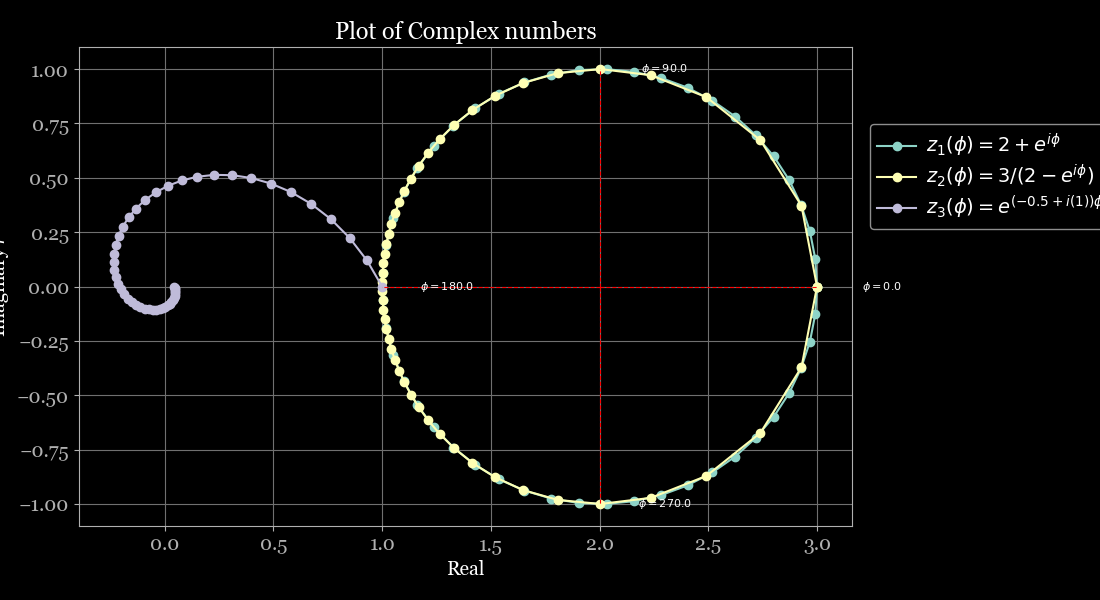

In [ ]:
fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot()

#parameters 
phi_value = np.linspace(0,2*np.pi, 50)
sigma_value = -0.5
omega_value = 1
##tt = np.linspace(-2,2,10)

z_1 =  2 + np.exp(1j * phi_value)
z_2 = 3/(2 - np.exp(1j * phi_value))
z_3 = np.exp((sigma_value + 1j * omega_value) * phi_value)

#real and imaginary parts for complex nmbers
real_parts_z_1 = np.real(z_1)
imaginary_parts_z_1 = np.imag(z_1)
real_parts_z_2 = np.real(z_2)
imaginary_parts_z_2 = np.imag(z_2)
real_parts_z_3 = np.real(z_3)
imaginary_parts_z_3 = np.imag(z_3)

ax.plot(real_parts_z_1, imaginary_parts_z_1, 'o-', label="$z_1(\phi) = 2 + e^{i \phi}$")
ax.plot(real_parts_z_2,imaginary_parts_z_2, 'o-', label="$z_2(\phi) = 3/(2 - e^{i \phi})$")
ax.plot(real_parts_z_3,imaginary_parts_z_3, 'o-', label="$z_3(\phi) = e^{(-0.5 + i (1))\phi}$")

ax.set_xlabel("Real")
ax.set_ylabel("Imaginary $i$")
ax.grid()

ax.set_title("Plot of Complex numbers")

ax.legend(bbox_to_anchor=(1.01, 0.6))
ax.set_aspect('equal')

# Plot phi values labels  - based on example from google
specific_phis = [0, np.pi/2, np.pi, 3*np.pi/2]
for p in specific_phis:
    point = 2 + np.exp(1j * p)
    # Line from the center of the circle (2, 0) to the point
    plt.plot([2, np.real(point)], [0, np.imag(point)], 'r--', linewidth=0.8)
    # Label the point
    plt.text(np.real(point+0.3), np.imag(point), f'$\phi={np.rad2deg(p)}$', fontsize=8, ha='center', va='center')




## Question 3B:
Calculate the magnitude $r(\phi)$ and argument $\theta(\phi)$ for each $z_i$.
## Question 3B Solution:

We know, $$r^2 = |z(\phi)|^2 = zz,*$$ and $$\theta(\phi) = arctan2 (Im(z), Re(z)).$$

So For $z_1(\phi) = 2 + e^{i \phi}$, 

\begin{align*}
r^2 &=  (2 + e^{i \phi})( 2 + e^{-i \phi}) & \mathbf{\theta(\phi)} &= \mathbf{arctan2(sin(\phi), 2 + cos(\phi))} \\
r^2 &= 4 + 2(e^{i \phi} + e^{-i \phi}) +1   \\
\mathbf{r} &= \mathbf{\sqrt{(5 + 4cos(\phi))}}
\end{align*}

For $z_2(\phi) = \dfrac{3}{2 - e^{i \phi}}$,
\begin{align*}
r^2 &=  \dfrac{3}{2 - e^{i \phi}} * \dfrac{3}{2 - e^{-i \phi}} &  \text{Expanding },  z_2(\phi) &= \dfrac{3}{2 - cos(\phi) + i sin(\phi)}  \\
r^2 &= \dfrac{9}{4 - 2(e^{i \phi} + e^{-i \phi}) + 1 }         &              z_2(\phi) &= \dfrac{3(2 - cos(\phi) - i sin(\phi))}{4 + cos^2(\phi) + sin^2(\phi) -4 cos(\phi)}  \\
\mathbf{r}   &= \mathbf{\sqrt{(\dfrac{9}{5 - 4cos(\phi)})}}    &               z_2(\phi) &= \dfrac{6 - 2 cos(\phi) - i 2sin(\phi)}{5 -4 cos(\phi)}\\
    &                                                          &  \text{Therefore },   \mathbf{\theta(\phi)} &= \mathbf{arctan2(\dfrac{ 2sin(\phi)}{5 -4 cos(\phi)},\dfrac{6 - 2cos(\phi)}{5 -4cos(\phi)})}  
\end{align*}

For $z_3(\phi) = e^{(\sigma + i \omega) t}$,
\begin{align*}
r^2 &=  e^{(\sigma + i \omega) t}* e^{(\sigma - i \omega) t} &  \mathbf{\theta(\phi)} &= \mathbf{arctan2(e^{\sigma}sin(\omega t),e^{\sigma}cos(\omega t))} \\
r^2 &=  e^{2 \sigma}                                         &  \\
\mathbf{r}  &= \mathbf{\sqrt{e^{2 \sigma}} }                               &   
\end{align*}


## Question 3C:
Calculate the velocity of the phasors with respect to $\phi$, and draw them for each $z_i$ evaluated at $\phi = \left\{0, \dfrac{\pi}{2}, \pi, \dfrac{3\pi}{2} \right\}$\\

## Question 3C Solution:
The velocity phasors with respect to $\phi$ for each complex number are,
\begin{align*}
\dot{z_1} &= i  e^{i \phi}. &\text{Normalized}, \dfrac{\dot{z_1}}{z_1} &= \dfrac{ i}{2e^{-i \phi} + 1 }\\
\dot{z_2} &= \dfrac{3ie^{i\phi}}{(2-e^{i\phi})^{2}} . &\text{Normalized}, \dfrac{\dot{z_2}}{z_2} &= \dfrac{ie^{i\phi}}{(2-e^{i\phi})}\\
\dot{z_3} &= 0
\end{align*}


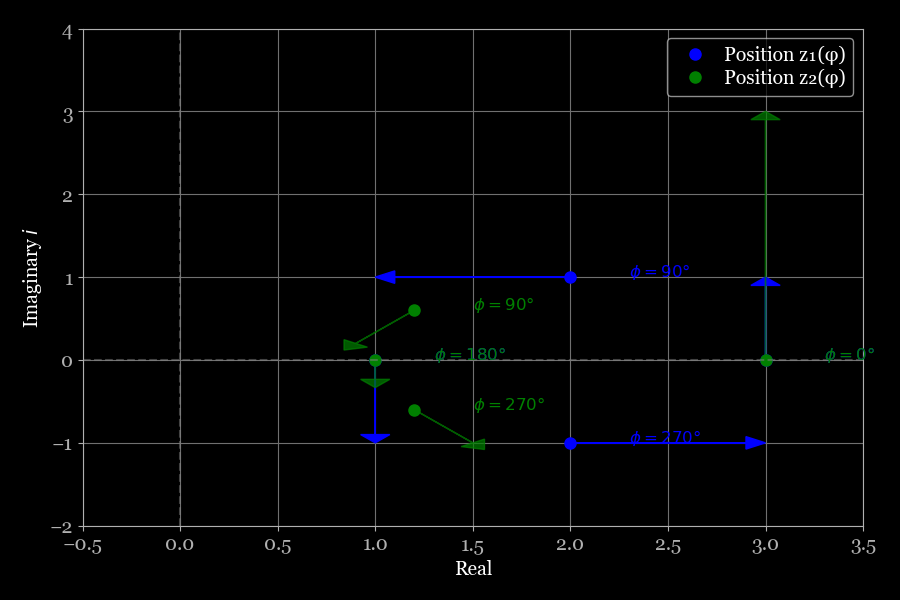

In [60]:
#parameters for plot for second part of question 3c
phi_values_3=np.array([0,np.pi / 2, np.pi, (3 * np.pi)/2])
z_1 =  2 + np.exp(1j * phi_values_3)
z_2 = 3/(2 - np.exp(1j * phi_values_3))

#real and imaginary parts for complex nmbers
real_parts_z_1 = np.real(z_1)
imaginary_parts_z_1 = np.imag(z_1)
real_parts_z_2 = np.real(z_2)
imaginary_parts_z_2 = np.imag(z_2)


velocity_z_1 = 1j * np.exp(1j * phi_values_3)
velocity_z_2 = (3 * 1j * np.exp(1j * phi_values_3)) / ((2 - np.exp(1j * phi_values_3))**2)

fig, ax = plt.subplots(1)

#z_1 positions
ax.plot(real_parts_z_1, imaginary_parts_z_1, 'bo', markersize=8, label='Position z₁(φ)')

# z_1 velocity arrows
for i in range(len(phi_values_3)):
    ax.arrow(real_parts_z_1[i], imaginary_parts_z_1[i], np.real(velocity_z_1)[i], np.imag(velocity_z_1)[i],
             head_width=0.15, head_length=0.1, fc='blue', ec='blue',
             length_includes_head=True, zorder=2)
# Adding phi labels for each point 
for p in phi_values_3:
    point = 2 + np.exp(1j * p)
    ax.text(np.real(point) + 0.3, np.imag(point), f'$\\phi={np.rad2deg(p):.0f}°$',color='b', fontsize = 12)

#z_2 positions
ax.plot(real_parts_z_2,imaginary_parts_z_2, 'go', markersize=8, label='Position z₂(φ)')

# z_2 velocity arrows
for i in range(len(phi_values_3)):
    ax.arrow(real_parts_z_2[i], imaginary_parts_z_2[i], np.real(velocity_z_2)[i], np.imag(velocity_z_2)[i],
             head_width=0.15, head_length=0.1, fc='green', ec='green', alpha=0.7,
             length_includes_head=True, zorder=2)
# Adding phi labels for each point 
for p in phi_values_3:
    point = 3 / (2 - np.exp(1j * p))
    ax.text(np.real(point) + 0.3, np.imag(point), f'$\\phi={np.rad2deg(p):.0f}°$',fontsize=12,color='g')

ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
ax.set_xlabel("Real")
ax.set_ylabel("Imaginary $i$")
ax.legend()
ax.grid()
ax.set_xlim(-0.5, 3.5)
ax.set_ylim(-2, 4)
plt.show()

## Question 3D:
What is the primary difference between $z_1$ and $z_2$?

## Question 3D solution:
The primary difference between $z_1$ and $z_2$ is the roation. $Z_1 \text { has the term } e^{i \phi}$ and $Z_2 \text { has the term } e^{-i \phi}$ producing different signs in the first derivative with respect to  $\phi$.

## Question 3E:
For $z_3$, substitute $t$ for $\phi$, and calculate the normalized time derivatives : $\dfrac{\dot{z_3}}{z_3}$, $\dfrac{\ddot{z_3}}{z_3}$

and find expressions for the normalized real polar coordinates $\dfrac{\dot{r}}{r}, \dfrac{\ddot{r}}{r}, \dot{\theta}, \ddot{\theta}$.

Discuss how the expressions you found for the polar coordinates relate to the path you plotted for $z_3$ in part A.  

What happens if $\sigma = +0.5$?

## Question 3E Solution:

Given $t$ = $\phi$, $z_3(\phi) = e^{(\sigma + i \omega) \phi}$.

Therfore, 
\begin{align*}
\dot{z}_3 &= (\sigma + i \omega)e^{(\sigma + i \omega) \phi}. &\text{ Therfore, } \frac{\dot{z}_3}{z_3} &= (\sigma + i \omega)\\
\ddot{z}_3 &= (\sigma + i \omega)^2 e^{(\sigma + i \omega) \phi}. &\text{ Therfore, }\frac{\ddot{z}_3}{z_3} &= (\sigma + i \omega)^2\\
\end{align*}
So, $ \frac{\dot{r}}{r} = \sigma$, $ \frac{\ddot{r}}{r}= \sigma^2 $,$\dot{\theta}= \omega$ and, $\ddot{\theta}= 0$.


The  $ \frac{\dot{r}}{r}$ shows that the rate of change of r poroptional to r is sigma. with sigmas placment in the phasor that shows the rate is an exponential growth.


The  $ \frac{\ddot{r}}{r}$ shows positive radial acceleration.


Finally, $\dot{\theta}$ and $\ddot{\theta}$ shos that there is constant angular speed and not acceleration.

If $\sigma = -0.5$, the only thing that changes from the discrition above is that the rate of radiuse is for sure exponentially deacreasing.

# <span style="color: #ff5500">Question 4: Electric field propogating in 2D</a>
In class, we assumed that an plane wave was propogating in the $\hat{k} = \hat{z}$ direction, with the electric field oscillating in the $\hat{x}$ direction.\
Suppose now that the is oscillating in the $\dfrac{1}{\sqrt{2}} (\hat{x} + \hat{y})$ direction: 
\begin{align}
\boldsymbol{E} = E_0 \cos(\vec{k} \cdot \vec{r} - \omega t) \dfrac{1}{\sqrt{2}} (\hat{x} + \hat{y})
\end{align}

## Question 4A:
What direction of propogation $\hat{k}$ and magnetic field vector $\boldsymbol{B}$ are now possible?\
Draw a diagram of the electric field vector and the plane of propogation.
## Question 4A Solution :
We know $\mathbf{k} \cdot \mathbf{E} = 0,$ which shows that a posible direction for $k$ is $\hat{z}$. Additionally using the cross product of $\mathbf{k}$ with $\mathbf{E}$ gives the direction of the magnetic feild $\mathbf{B}$ it conclueds $\mathbf{B}$ is in the $(\hat{x} - \hat{y})$
This is shown by, 
\begin{align}
\hat{z} \cdot (\hat{x} + \hat{y}) &= 0 \\
\hat{z} \times (\hat{x} + \hat{y}) &= \hat{y} - \hat{x}
\end{align}

### Drawing for electric field vector propagating
![alt text](IMG_0383.jpg)

## Question 4B:
What are the expressions for $\hat{k}$ and $\boldsymbol{B}$ if we constrain the direction of propogating to be (partially) in the positive $\hat{x}$ direction? 

# <span style="color: #ff5500">Question 5: Spherical Plane Wave Intensity and Radiation Pressure</a>

Suppose you have a sinusoidal spherical plane wave source a distance $d$ away along the $\hat{z}$ axis from a cylindrical mirror with radius $a$.\
Use the center of the spherical wave as the origin, and the distance from that center as the variable $r$.\
Assume that the cylinder is in the $xy$ plane.\
Also assume that the spherical wave is emitting total power $P_\mathrm{total}$ in all directions.


## Question 5A:
What is the Poynting vector $\boldsymbol{S}$ for the spherical waves?\
*Hint: Equation 9.49 of Griffith's E&M may be helpful here*

## Question 5B:
What is the Poynting vector $\boldsymbol{S}$ incident on the mirror center?\
What about the mirror edge?\
Write an expression for the Poynting vector incident anywhere on the mirror's surface.

## Question 5C:
Using your result from Question 5B, find the intensity $I$ incident on the mirror.

## Question 5D:
Find the total power $P$ incident on the mirror.\
Compare to the total power emitted by the spherical plane wave.

## Question 5E: 
Calculate the radiation pressure $p_\mathrm{rad}$ incident on the mirror.\
Also find the radiation pressure force $F_\mathrm{rad}$.\
Assume the mirror is a perfect reflector.\
If the mirror has a mass $m$, what is its acceleration?

## Questionn 5 Solution:
![alt text](Page1.jpg)
![alt text](Page2.jpg)
